In [1]:
import pandas as pd
import preprocessing.overview_vectorizer as ov
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns

In [2]:
def draw_delta_wordclouds(pos_df, neg_df):
    # 딕셔너리 형태로 변환 (단어: 점수)
    pos_dict = dict(zip(pos_df['keyword'], pos_df['tfidf_score']))
    neg_dict = dict(zip(neg_df['keyword'], neg_df['tfidf_score']))

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # 성공작 (Blue)
    wc_pos = WordCloud(width=800, height=800, background_color='white',
                       colormap='Blues', max_words=30).generate_from_frequencies(pos_dict)
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].set_title('Success Narrative (Hit+)', fontsize=25, pad=20)
    axes[0].axis('off')

    # 실패작 (Red)
    wc_neg = WordCloud(width=800, height=800, background_color='white',
                       colormap='Reds', max_words=30).generate_from_frequencies(neg_dict)
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].set_title('Failure Narrative (Non-Hit+)', fontsize=25, pad=20)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [3]:
df = ov.load_files('files/final_files/movie/00_movie_main.parquet')
extracter = ov.OverViewVectorizer()

spaCy 모델 로딩 중...
완료!


In [4]:
extracter.fit(df)

   진행: 5000/20551
   진행: 10000/20551
   진행: 15000/20551
   진행: 20000/20551


In [5]:
extracter.extract_keywords()

In [6]:
result_df = extracter.df

In [7]:
pos_df, neg_df = extracter.extract_delta_keywords()

In [8]:
pos_df = pos_df.sort_values('tfidf_score').reset_index(drop=True)
neg_df = neg_df.sort_values('tfidf_score').reset_index(drop=True)

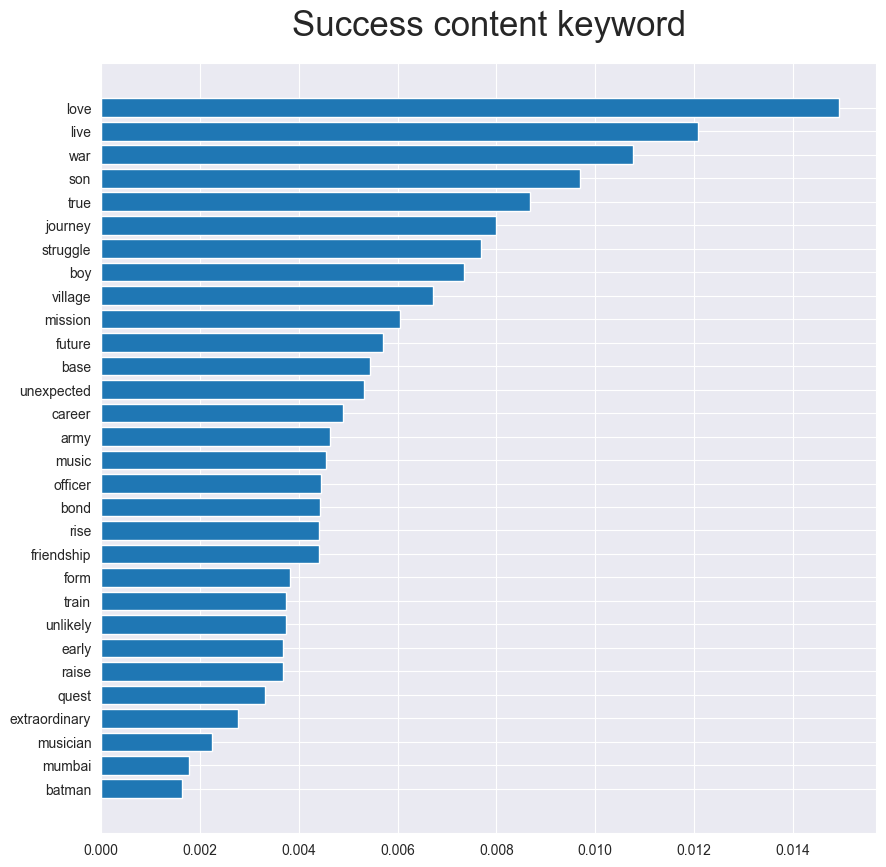

In [9]:
plt.figure(figsize = (10,10))
plt.barh(pos_df['keyword'], pos_df['tfidf_score'])
plt.title('Success content keyword', fontsize=25, pad=20)
plt.show()

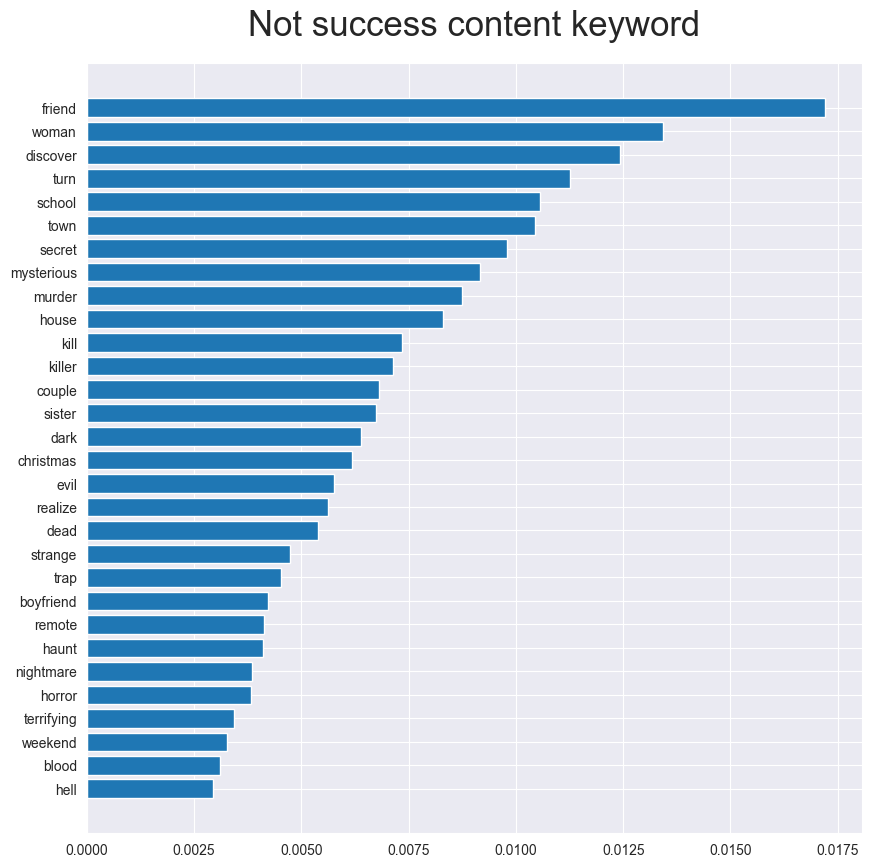

In [10]:
plt.figure(figsize = (10,10))
plt.barh(neg_df['keyword'], neg_df['tfidf_score'])
plt.title('Not success content keyword', fontsize=25, pad=20)
plt.show()

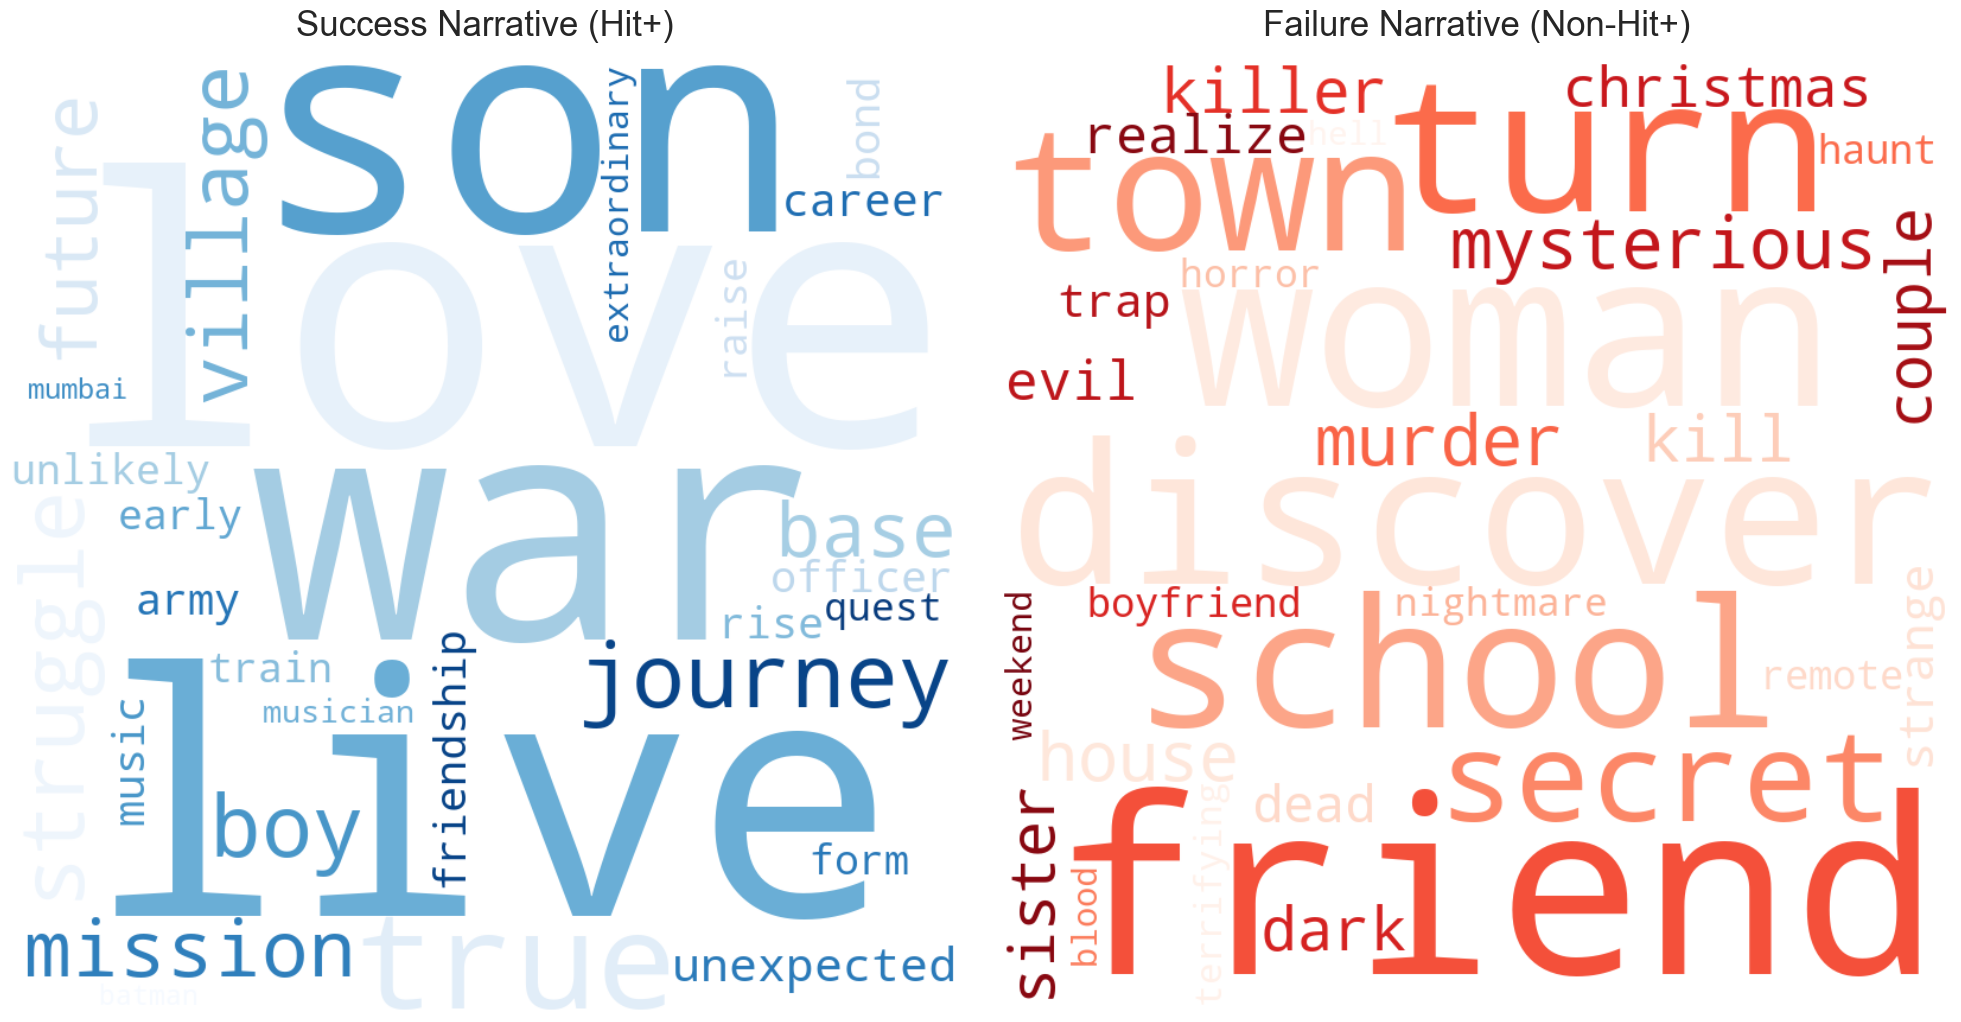

In [11]:
# 실행
draw_delta_wordclouds(pos_df, neg_df)

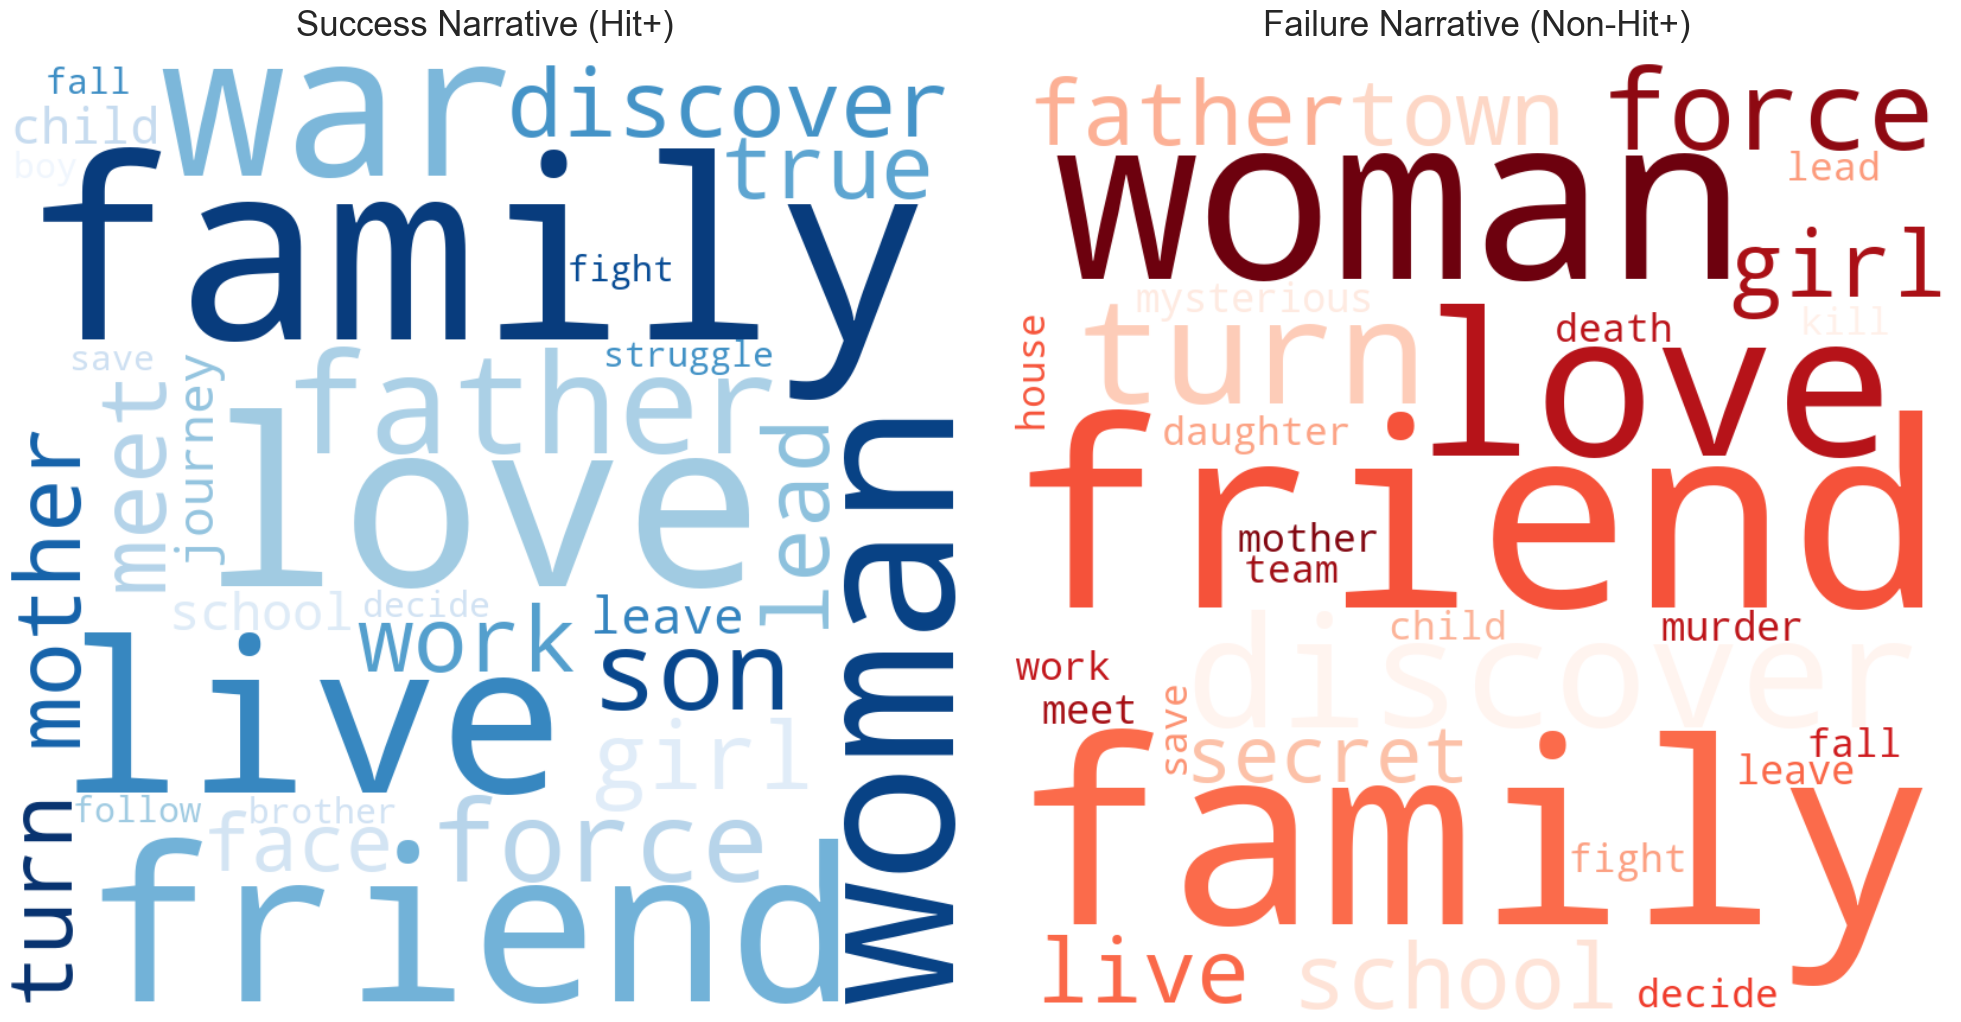

In [12]:
top_indices = extracter.df[extracter.df['hit_label'] == 1].index.tolist()
bottom_indices = extracter.df[extracter.df['nonhit_label'] == 1].index.tolist()

top_mean = extracter.tfidf_matrix[top_indices].mean(axis=0).A1
bottom_mean = extracter.tfidf_matrix[bottom_indices].mean(axis=0).A1

pos_indices = np.argsort(top_mean)[::-1][:30]
neg_indices = np.argsort(bottom_mean)[::-1][:30]

pos_df = pd.DataFrame({
    'keyword': extracter.feature_names[pos_indices],
    'tfidf_score': top_mean[pos_indices],
})

neg_df = pd.DataFrame({
    'keyword': extracter.feature_names[neg_indices],
    'tfidf_score': bottom_mean[neg_indices],
})

draw_delta_wordclouds(pos_df, neg_df)

In [13]:
d_df = ov.load_files(main_file_path='files/final_files/drama/00_drama_main.parquet')
d_extracter = ov.OverViewVectorizer()

spaCy 모델 로딩 중...
완료!


In [14]:
d_extracter.fit(d_df)

In [15]:
d_extracter.extract_keywords()

In [16]:
result_d_df = d_extracter.df

In [17]:
d_pos_df, d_neg_df = d_extracter.extract_delta_keywords()
d_pos_df = d_pos_df.sort_values('tfidf_score').reset_index(drop=True)
d_neg_df = d_neg_df.sort_values('tfidf_score').reset_index(drop=True)

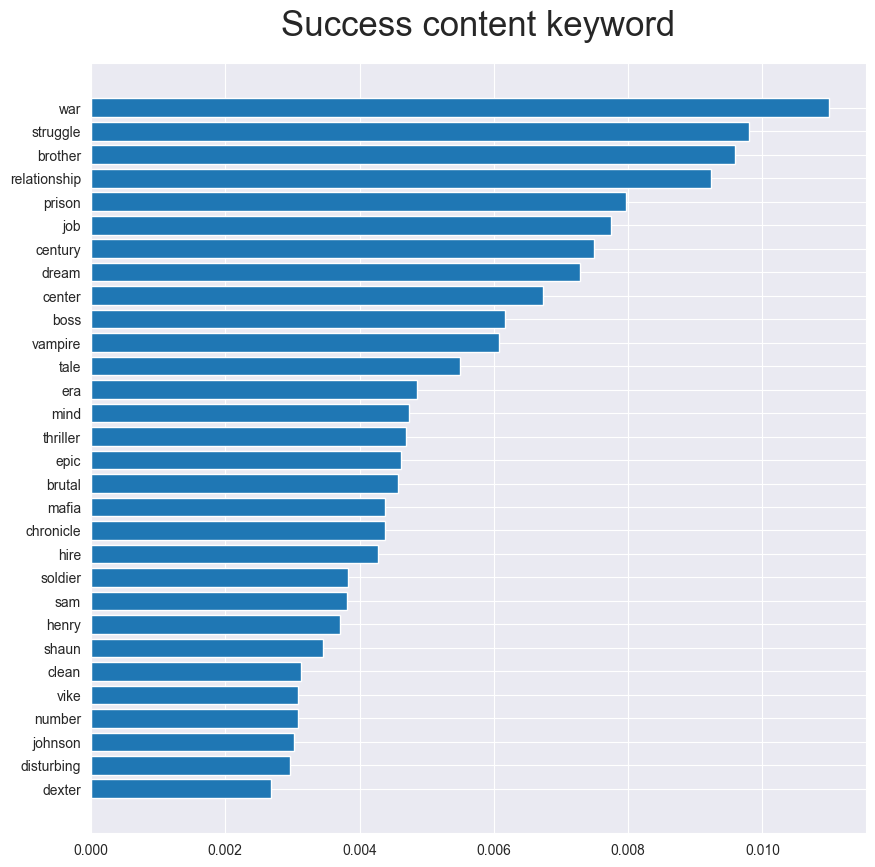

In [18]:
plt.figure(figsize = (10,10))
plt.barh(d_pos_df['keyword'], d_pos_df['tfidf_score'])
plt.title('Success content keyword', fontsize=25, pad=20)
plt.show()

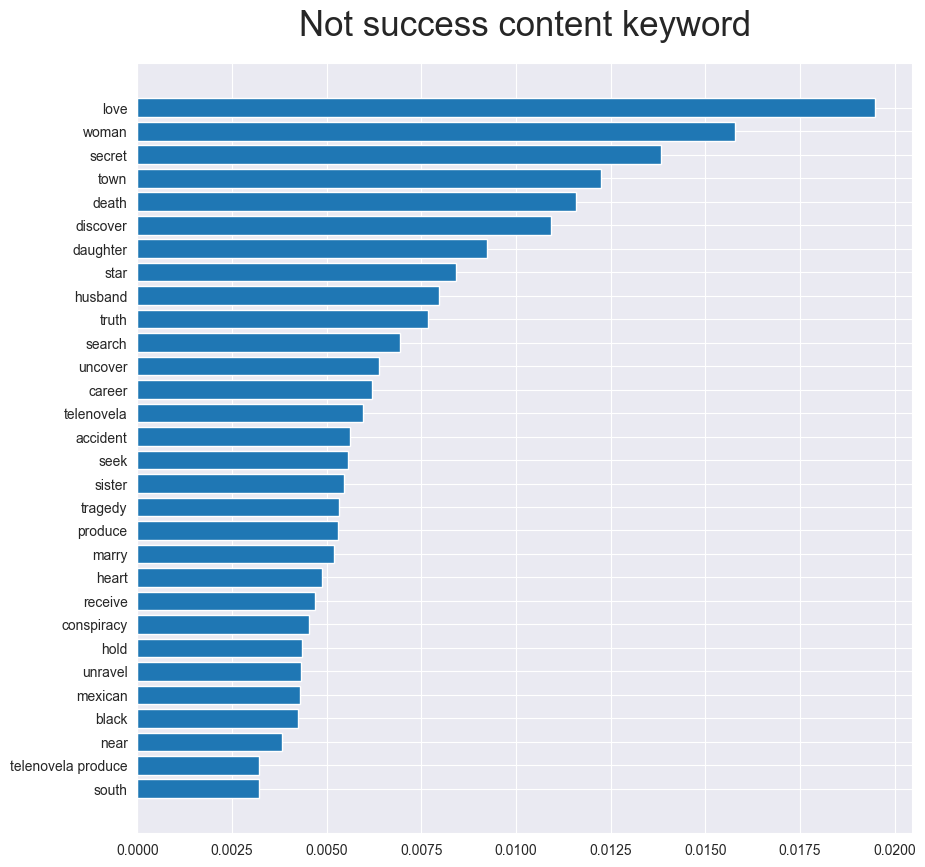

In [19]:
plt.figure(figsize = (10,10))
plt.barh(d_neg_df['keyword'], d_neg_df['tfidf_score'])
plt.title('Not success content keyword', fontsize=25, pad=20)
plt.show()

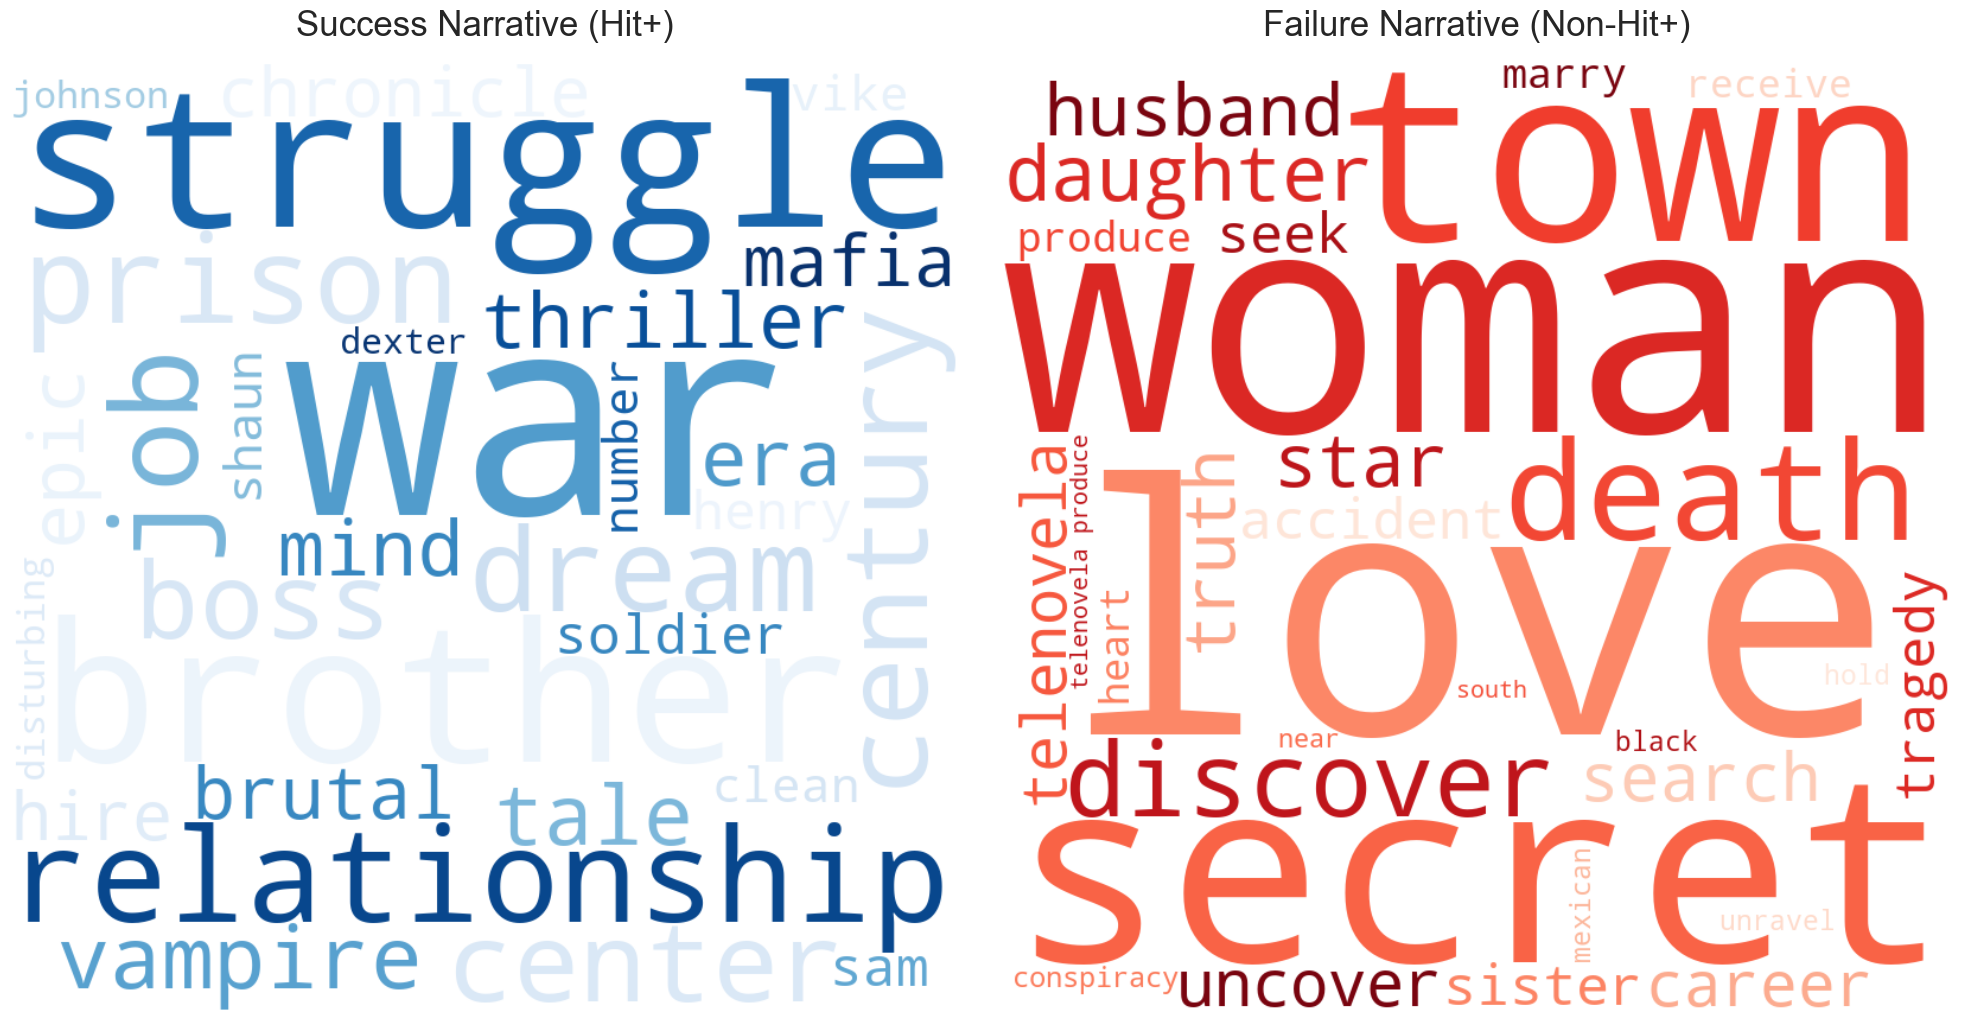

In [20]:
draw_delta_wordclouds(d_pos_df, d_neg_df)

In [21]:
top_indices = d_extracter.df[d_extracter.df['hit_label'] == 1].index.tolist()
bottom_indices = d_extracter.df[d_extracter.df['nonhit_label'] == 1].index.tolist()

top_mean = d_extracter.tfidf_matrix[top_indices].mean(axis=0).A1
bottom_mean = d_extracter.tfidf_matrix[bottom_indices].mean(axis=0).A1

pos_indices = np.argsort(top_mean)[::-1][:30]
neg_indices = np.argsort(bottom_mean)[::-1][:30]

pos_df = pd.DataFrame({
    'keyword': d_extracter.feature_names[pos_indices],
    'tfidf_score': top_mean[pos_indices],
})

neg_df = pd.DataFrame({
    'keyword': d_extracter.feature_names[neg_indices],
    'tfidf_score': bottom_mean[neg_indices],
})

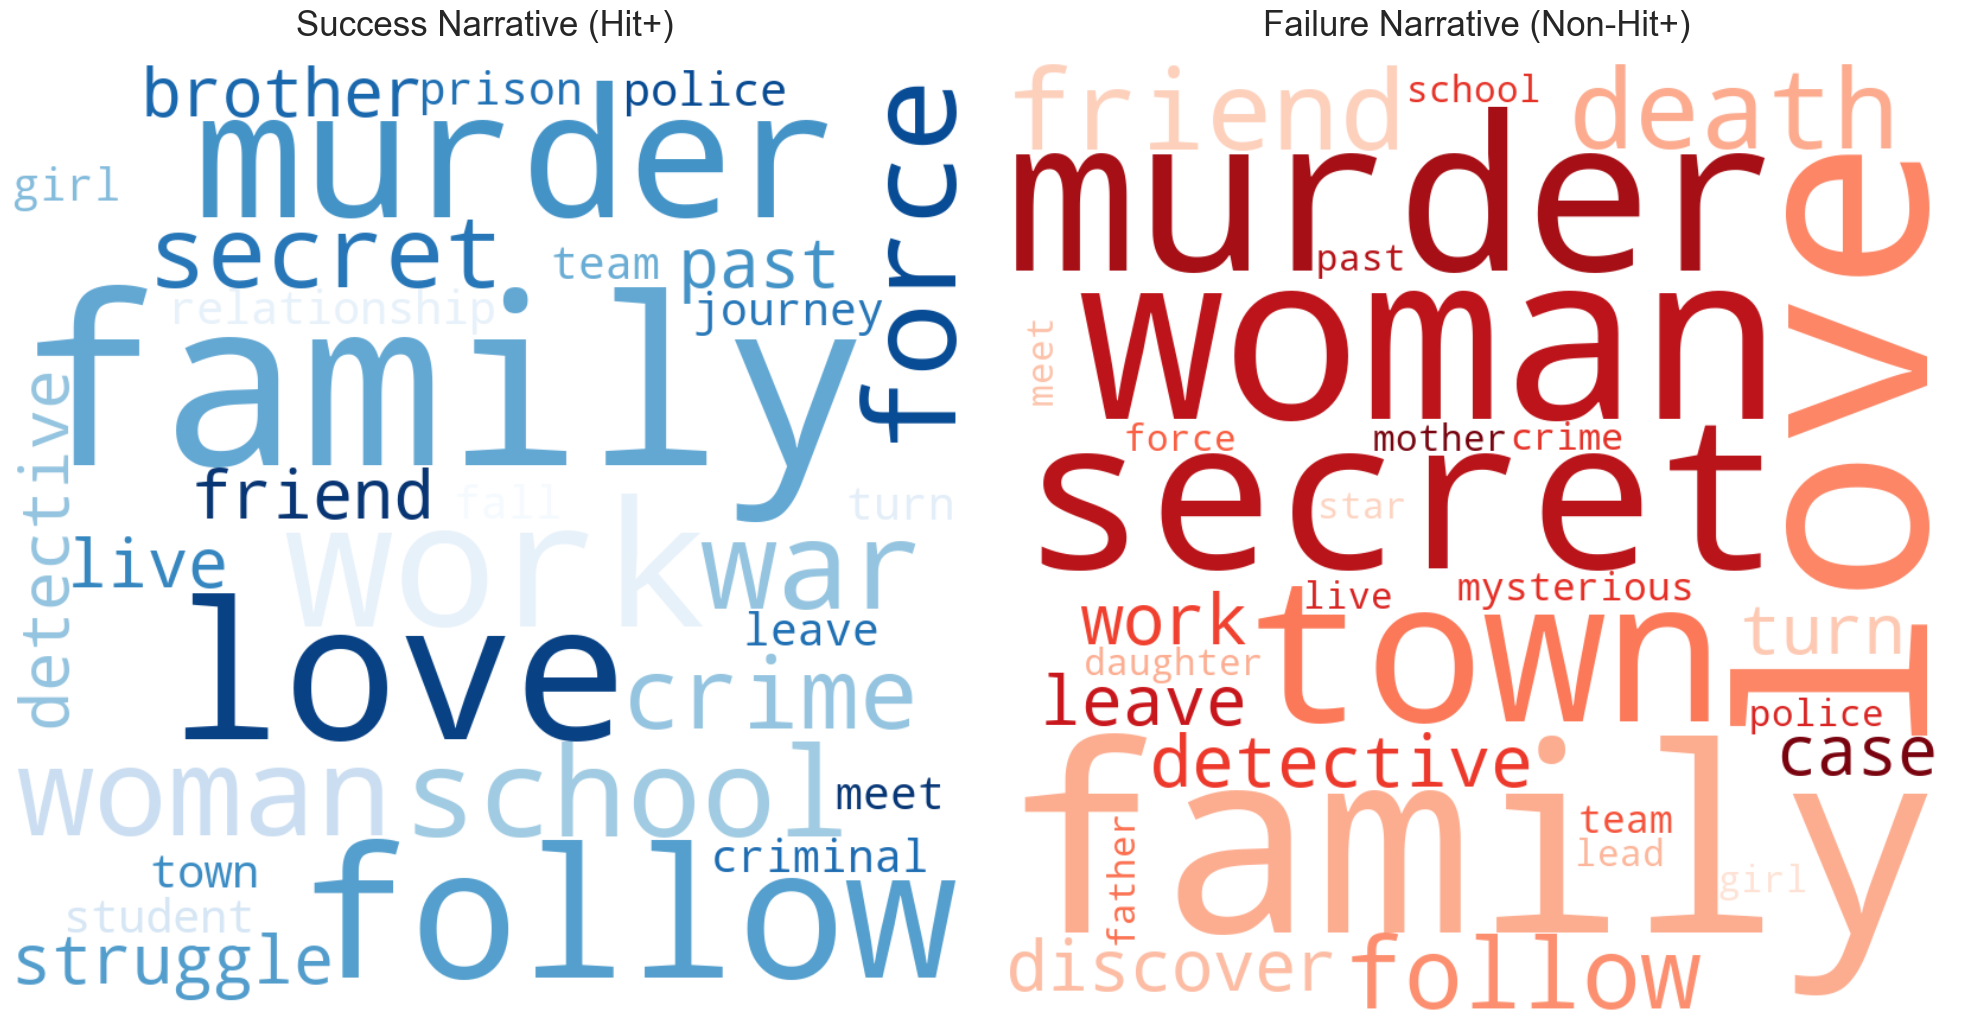

In [22]:
draw_delta_wordclouds(pos_df, neg_df)

In [23]:
pos_indices

array([1239, 2027, 1346, 2247, 3840, 3000, 3830, 3759, 1359, 3033,  743,
       3325, 1400,  389, 1995, 2469,  903, 2822, 3522, 2557, 3330, 1958,
       1451,  748, 2141, 3421, 1860, 1225, 2643, 3590])